In this notebook, we will learn how to :

- Clean columns names.
- Extract and convert numeric values from string values.
- Extract string data.
- Work with missing values.

We'll be working with laptops.csv, a CSV file containing information on about 1,300 laptop computers.

In [1]:
!cat laptops.csv | cut -d "," -f 1-7

Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM
Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB
Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB
HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB
Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB
Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB
Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB
Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB
Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB
Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB
Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB
HP,250 G6,Notebook,"15.6""",1366x768,Intel Core i5 7200U 2.5GHz,4GB
HP,250 G6,Not

## Reading CSV Files with Encodings

We can start by reading the data into pandas. Let's look at what happens when we use pandas.read_csv() function with only the filename argument:

In [2]:
import numpy as np
import pandas as pd

In [3]:
laptops = pd.read_csv("laptops.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 4: invalid continuation byte

We get an error! Since the file we try to read was not coded in 'utf-8'. To properly read data in this file, we need to specify the correct encoding that was used to encode the data in the file.

In [4]:
laptops = pd.read_csv("laptops.csv", encoding="latin-1")
laptops

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,"400,00"
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,"2139,97"
7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"1158,70"
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,"1495,00"
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,"770,00"


In [5]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
Manufacturer                1303 non-null object
Model Name                  1303 non-null object
Category                    1303 non-null object
Screen Size                 1303 non-null object
Screen                      1303 non-null object
CPU                         1303 non-null object
RAM                         1303 non-null object
 Storage                    1303 non-null object
GPU                         1303 non-null object
Operating System            1303 non-null object
Operating System Version    1133 non-null object
Weight                      1303 non-null object
Price (Euros)               1303 non-null object
dtypes: object(13)
memory usage: 132.4+ KB


## Cleaning Column Names

We can see that every column is represented as the object type, indicating that they are represented by strings and not numbers. One of the columns, Operating System Version, has some null values.

In [6]:
laptops.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')

The column labels have a variety of upper and lowercase letters, as well as spaces and parentheses. Because we represent column labels as strings, this isn't inherently a problem, but you'll find that uniform column labels will be easier to work with. We'll clean our column labels by:

- Removing any whitespace from the start and end of the labels - if you look closely you'll notice that the " Storage" column label has a space in front of it. These quirks with column labels are often hard to spot, so removing them at the start will save you pain in the long run.

- Replacing spaces with underscores and remove special characters - this will make things consistent, and also allows for the use of dot accessors for those who prefer that.

- Make all labels lowercase - this is good for consistency, and means you'll never have to remember what is capitalized and how.
Shorten any long column names - this helps to keep your code easier to read, especially when you are using method chaining.

In [7]:
# This function clean a string label as we described above
def clean_label(s):
    s = s.strip();
    s = s.replace("Operating System", "os")
    s = s.replace(" ", "_")
    s = s.replace("(", "")
    s = s.replace(")", "")
    s = s.lower()
    return s

In [8]:
# Apply the clean function to each column name
new_label = [clean_label(label) for label in laptops.columns]

In [9]:
new_label

['manufacturer',
 'model_name',
 'category',
 'screen_size',
 'screen',
 'cpu',
 'ram',
 'storage',
 'gpu',
 'os',
 'os_version',
 'weight',
 'price_euros']

In [10]:
laptops.columns = new_label

In [11]:
laptops.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


## Converting String Columns to Numeric

In [12]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
manufacturer    1303 non-null object
model_name      1303 non-null object
category        1303 non-null object
screen_size     1303 non-null object
screen          1303 non-null object
cpu             1303 non-null object
ram             1303 non-null object
storage         1303 non-null object
gpu             1303 non-null object
os              1303 non-null object
os_version      1133 non-null object
weight          1303 non-null object
price_euros     1303 non-null object
dtypes: object(13)
memory usage: 132.4+ KB


In [13]:
laptops.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


We notice that some columns store numeric data but with extra symbol, that make the type of those columns non-numeric. We will remove the extra symbols and convert the type of that columns (object) into numeric type (float). For example, the ram column has extra symbol "GB", the weight has extra symbol "kg"

In [14]:
laptops.ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [15]:
# Remove the GB symbol by slicing each string not included the last two index, and then cast to type int
laptops.ram.str.slice(0, -2).astype('int')

0        8
1        8
2        8
3       16
4        8
5        4
6       16
7        8
8       16
9        8
10       4
11       4
12      16
13       4
14       8
15       8
16       8
17      16
18       8
19       8
20       2
21       8
22       4
23       8
24       8
25       4
26       8
27       8
28       8
29       8
        ..
1273     6
1274     4
1275     8
1276     6
1277     4
1278     2
1279     8
1280     6
1281     8
1282     2
1283     4
1284     4
1285    16
1286     2
1287     6
1288     4
1289     8
1290     6
1291     4
1292     2
1293     8
1294     6
1295     8
1296     2
1297     4
1298     4
1299    16
1300     2
1301     6
1302     4
Name: ram, Length: 1303, dtype: int32

We create a new column named ram_gb to store the data of column ram converted to numeric type.

In [16]:
laptops['ram_gb'] = laptops.ram.str.slice(0, -2).astype('int')

In [17]:
# Notice the new column created and its type
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
manufacturer    1303 non-null object
model_name      1303 non-null object
category        1303 non-null object
screen_size     1303 non-null object
screen          1303 non-null object
cpu             1303 non-null object
ram             1303 non-null object
storage         1303 non-null object
gpu             1303 non-null object
os              1303 non-null object
os_version      1133 non-null object
weight          1303 non-null object
price_euros     1303 non-null object
ram_gb          1303 non-null int32
dtypes: int32(1), object(13)
memory usage: 137.5+ KB


In [18]:
# Clean the price_europe column
laptops["price_euros_num"] = laptops.price_euros.str.replace(",", ".").astype("float")

In [19]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
manufacturer       1303 non-null object
model_name         1303 non-null object
category           1303 non-null object
screen_size        1303 non-null object
screen             1303 non-null object
cpu                1303 non-null object
ram                1303 non-null object
storage            1303 non-null object
gpu                1303 non-null object
os                 1303 non-null object
os_version         1133 non-null object
weight             1303 non-null object
price_euros        1303 non-null object
ram_gb             1303 non-null int32
price_euros_num    1303 non-null float64
dtypes: float64(1), int32(1), object(13)
memory usage: 147.7+ KB


Next, we clean the weight column. First, look at this column to find understand it pattern and detect any exception.

In [20]:
laptops.weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [22]:
laptops.weight.str.match(".*[0-9](kg)$").all()

False

In [23]:
# Observe the special case
laptops.weight[~laptops.weight.str.match(".*[0-9](kg)$")]

1061    4kgs
Name: weight, dtype: object

In [24]:
# Clean the weight column
laptops.weight.str.replace("kg", "").astype("float")

ValueError: could not convert string to float: '4s'

In [25]:
# Create a new column for the cleaned data
laptops["weight_kg"] = laptops["weight"].str.replace("kg", "").str.replace("s", "").astype("float")

In [26]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
manufacturer       1303 non-null object
model_name         1303 non-null object
category           1303 non-null object
screen_size        1303 non-null object
screen             1303 non-null object
cpu                1303 non-null object
ram                1303 non-null object
storage            1303 non-null object
gpu                1303 non-null object
os                 1303 non-null object
os_version         1133 non-null object
weight             1303 non-null object
price_euros        1303 non-null object
ram_gb             1303 non-null int32
price_euros_num    1303 non-null float64
weight_kg          1303 non-null float64
dtypes: float64(2), int32(1), object(13)
memory usage: 157.9+ KB


With the new numerical columns, we can answer some basic question such as

In [27]:
# What is the average laptop weight ?
laptops.weight_kg.mean()

2.038733691481197

In [28]:
# What is the average laptop price ?
laptops.price_euros_num.mean()

1123.6869915579434

In [29]:
# What is the average Macbook weight ?
laptops.loc[laptops.manufacturer == "Apple", "weight_kg"].mean()

1.320476190476191

In [30]:
# What is the average Macbook price ?
laptops.loc[laptops.manufacturer == "Apple", "price_euros_num"].mean()

1564.1985714285713

## Extracting Values from Strings

Observing the cpu column, we notice that the manufacturer of the cpu is the first word of the string. We will extract that information and create a new column to store it.

In [31]:
laptops.cpu.head(10)

0          Intel Core i5 2.3GHz
1          Intel Core i5 1.8GHz
2    Intel Core i5 7200U 2.5GHz
3          Intel Core i7 2.7GHz
4          Intel Core i5 3.1GHz
5       AMD A9-Series 9420 3GHz
6          Intel Core i7 2.2GHz
7          Intel Core i5 1.8GHz
8    Intel Core i7 8550U 1.8GHz
9    Intel Core i5 8250U 1.6GHz
Name: cpu, dtype: object

In [37]:
# Approach 1: Using str.split with expand=True 
laptops.cpu.str.split(expand=True)[0]

0       Intel
1       Intel
2       Intel
3       Intel
4       Intel
5         AMD
6       Intel
7       Intel
8       Intel
9       Intel
10      Intel
11      Intel
12      Intel
13      Intel
14      Intel
15      Intel
16      Intel
17      Intel
18      Intel
19      Intel
20      Intel
21      Intel
22        AMD
23      Intel
24      Intel
25      Intel
26      Intel
27      Intel
28      Intel
29      Intel
        ...  
1273    Intel
1274    Intel
1275    Intel
1276    Intel
1277    Intel
1278    Intel
1279    Intel
1280      AMD
1281    Intel
1282    Intel
1283    Intel
1284    Intel
1285    Intel
1286    Intel
1287    Intel
1288    Intel
1289    Intel
1290    Intel
1291    Intel
1292    Intel
1293    Intel
1294      AMD
1295    Intel
1296    Intel
1297    Intel
1298    Intel
1299    Intel
1300    Intel
1301    Intel
1302    Intel
Name: 0, Length: 1303, dtype: object

In [38]:
# Approach 2: Using apply function 
laptops.cpu.str.split().apply(lambda l: l[0])

0       Intel
1       Intel
2       Intel
3       Intel
4       Intel
5         AMD
6       Intel
7       Intel
8       Intel
9       Intel
10      Intel
11      Intel
12      Intel
13      Intel
14      Intel
15      Intel
16      Intel
17      Intel
18      Intel
19      Intel
20      Intel
21      Intel
22        AMD
23      Intel
24      Intel
25      Intel
26      Intel
27      Intel
28      Intel
29      Intel
        ...  
1273    Intel
1274    Intel
1275    Intel
1276    Intel
1277    Intel
1278    Intel
1279    Intel
1280      AMD
1281    Intel
1282    Intel
1283    Intel
1284    Intel
1285    Intel
1286    Intel
1287    Intel
1288    Intel
1289    Intel
1290    Intel
1291    Intel
1292    Intel
1293    Intel
1294      AMD
1295    Intel
1296    Intel
1297    Intel
1298    Intel
1299    Intel
1300    Intel
1301    Intel
1302    Intel
Name: cpu, Length: 1303, dtype: object

In [40]:
# Approach 3: Using regular expression
laptops.cpu.str.extract("(\w*) ", expand=False)

0       Intel
1       Intel
2       Intel
3       Intel
4       Intel
5         AMD
6       Intel
7       Intel
8       Intel
9       Intel
10      Intel
11      Intel
12      Intel
13      Intel
14      Intel
15      Intel
16      Intel
17      Intel
18      Intel
19      Intel
20      Intel
21      Intel
22        AMD
23      Intel
24      Intel
25      Intel
26      Intel
27      Intel
28      Intel
29      Intel
        ...  
1273    Intel
1274    Intel
1275    Intel
1276    Intel
1277    Intel
1278    Intel
1279    Intel
1280      AMD
1281    Intel
1282    Intel
1283    Intel
1284    Intel
1285    Intel
1286    Intel
1287    Intel
1288    Intel
1289    Intel
1290    Intel
1291    Intel
1292    Intel
1293    Intel
1294      AMD
1295    Intel
1296    Intel
1297    Intel
1298    Intel
1299    Intel
1300    Intel
1301    Intel
1302    Intel
Name: cpu, Length: 1303, dtype: object

In [41]:
laptops["cpu_manufacturer"] = laptops.cpu.str.extract("(\w*) ", expand=False)

In [42]:
laptops.cpu_manufacturer.value_counts()

Intel      1240
AMD          62
Samsung       1
Name: cpu_manufacturer, dtype: int64

Next, we want to extract the cpu speed from the cpu column.

In [43]:
laptops.cpu.head()

0          Intel Core i5 2.3GHz
1          Intel Core i5 1.8GHz
2    Intel Core i5 7200U 2.5GHz
3          Intel Core i7 2.7GHz
4          Intel Core i5 3.1GHz
Name: cpu, dtype: object

In [44]:
laptops.cpu.str.replace("GHz", "").str.extract(" ([0-9\.]*)$").astype("float")

,0
0,2.30
1,1.80
2,2.50
3,2.70
4,3.10
5,3.00
6,2.20
7,1.80
8,1.80
9,1.60


In [45]:
laptops["cpu_speed_ghz"] =  laptops.cpu.str.replace("GHz", "").str.extract(" ([0-9\.]*)$").astype("float")

In [46]:
# What laptops have highest cpu speed ?
laptops[laptops.cpu_speed_ghz == laptops.cpu_speed_ghz.max()]

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros,ram_gb,price_euros_num,weight_kg,cpu_manufacturer,cpu_speed_ghz
341,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,12GB,2TB HDD,AMD Radeon 530,Windows,10,2.2kg,"899,00",12,899.00,2.2,AMD,3.6
591,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,12GB,512GB SSD,AMD Radeon 530,Windows,10,2.2kg,"949,00",12,949.00,2.2,AMD,3.6
702,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",1366x768,AMD A12-Series 9720P 3.6GHz,8GB,1TB HDD,AMD Radeon R7,Windows,10,2.2kg,"429,00",8,429.00,2.2,AMD,3.6
982,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,"549,00",6,549.00,2.2,AMD,3.6
1240,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,"597,57",6,597.57,2.2,AMD,3.6


## Correcting Bad Values

In [47]:
laptops.os.value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          13
Mac OS          8
Android         2
Name: os, dtype: int64

We can see that there are two variations on how the Apple operating system macOS exists in our dataset: Mac OS and macOS. We will fix that using Series.map() method.

In [48]:
mapping = {"Windows": "Windows", "No OS": "No OS", "Linux": "Linux", "Chrome OS": "Chrome OS",
           "macOS": "macOS", "Mac OS": "macOS", "Android": "Android"}

In [49]:
laptops.os.map(mapping).value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          21
Android         2
Name: os, dtype: int64

In [50]:
laptops['os_new'] = laptops.os.map(mapping)

In [51]:
laptops.os_new.value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          21
Android         2
Name: os_new, dtype: int64

## Dropping Missing Values

To check whether our dataset has null value, we will use to approach: 

In [52]:
# Approach 1: info() method
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
manufacturer        1303 non-null object
model_name          1303 non-null object
category            1303 non-null object
screen_size         1303 non-null object
screen              1303 non-null object
cpu                 1303 non-null object
ram                 1303 non-null object
storage             1303 non-null object
gpu                 1303 non-null object
os                  1303 non-null object
os_version          1133 non-null object
weight              1303 non-null object
price_euros         1303 non-null object
ram_gb              1303 non-null int32
price_euros_num     1303 non-null float64
weight_kg           1303 non-null float64
cpu_manufacturer    1303 non-null object
cpu_speed_ghz       1303 non-null float64
os_new              1303 non-null object
dtypes: float64(3), int32(1), object(15)
memory usage: 188.4+ KB


In [53]:
laptops.os_version

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5        10
6         X
7       NaN
8        10
9        10
10      NaN
11      NaN
12      NaN
13       10
14      NaN
15      NaN
16       10
17      NaN
18      NaN
19       10
20       10
21       10
22      NaN
23       10
24       10
25       10
26        X
27       10
28       10
29       10
       ... 
1273     10
1274     10
1275     10
1276     10
1277    NaN
1278     10
1279     10
1280     10
1281    NaN
1282     10
1283     10
1284     10
1285     10
1286     10
1287     10
1288     10
1289     10
1290     10
1291    NaN
1292     10
1293     10
1294     10
1295    NaN
1296     10
1297     10
1298     10
1299     10
1300     10
1301     10
1302     10
Name: os_version, Length: 1303, dtype: object

In [54]:
# Approach 2: .isnull() method
laptops.isnull() # Check null value at every place

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros,ram_gb,price_euros_num,weight_kg,cpu_manufacturer,cpu_speed_ghz,os_new
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [55]:
# Check null value on column. Which column has null values ?
laptops.isnull().any()

manufacturer        False
model_name          False
category            False
screen_size         False
screen              False
cpu                 False
ram                 False
storage             False
gpu                 False
os                  False
os_version           True
weight              False
price_euros         False
ram_gb              False
price_euros_num     False
weight_kg           False
cpu_manufacturer    False
cpu_speed_ghz       False
os_new              False
dtype: bool

In [56]:
# How many null values in each column ?
laptops.isnull().sum()

manufacturer          0
model_name            0
category              0
screen_size           0
screen                0
cpu                   0
ram                   0
storage               0
gpu                   0
os                    0
os_version          170
weight                0
price_euros           0
ram_gb                0
price_euros_num       0
weight_kg             0
cpu_manufacturer      0
cpu_speed_ghz         0
os_new                0
dtype: int64

We have a few options for how we can handle missing values:

- Remove any rows that have missing values.
- Remove any columns that have missing values.
- Fill the missing values with some other value.
- Leave the missing values as is.

In [57]:
# Remove a column
laptops.drop(labels='os_version', axis=1)

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,weight,price_euros,ram_gb,price_euros_num,weight_kg,cpu_manufacturer,cpu_speed_ghz,os_new
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,"1339,69",8,1339.69,1.37,Intel,2.30,macOS
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,"898,94",8,898.94,1.34,Intel,1.80,macOS
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,"575,00",8,575.00,1.86,Intel,2.50,No OS
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,"2537,45",16,2537.45,1.83,Intel,2.70,macOS
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,"1803,60",8,1803.60,1.37,Intel,3.10,macOS
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,2.1kg,"400,00",4,400.00,2.10,AMD,3.00,Windows
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,2.04kg,"2139,97",16,2139.97,2.04,Intel,2.20,macOS
7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,"1158,70",8,1158.70,1.34,Intel,1.80,macOS
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,1.3kg,"1495,00",16,1495.00,1.30,Intel,1.80,Windows
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,1.6kg,"770,00",8,770.00,1.60,Intel,1.60,Windows


In [58]:
# Remove all columns with null values
laptops.dropna(axis=1)

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,weight,price_euros,ram_gb,price_euros_num,weight_kg,cpu_manufacturer,cpu_speed_ghz,os_new
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,"1339,69",8,1339.69,1.37,Intel,2.30,macOS
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,"898,94",8,898.94,1.34,Intel,1.80,macOS
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,"575,00",8,575.00,1.86,Intel,2.50,No OS
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,"2537,45",16,2537.45,1.83,Intel,2.70,macOS
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,"1803,60",8,1803.60,1.37,Intel,3.10,macOS
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,2.1kg,"400,00",4,400.00,2.10,AMD,3.00,Windows
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,2.04kg,"2139,97",16,2139.97,2.04,Intel,2.20,macOS
7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,"1158,70",8,1158.70,1.34,Intel,1.80,macOS
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,1.3kg,"1495,00",16,1495.00,1.30,Intel,1.80,Windows
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,1.6kg,"770,00",8,770.00,1.60,Intel,1.60,Windows


In [61]:
# Remove all row with null values
laptops.dropna()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros,ram_gb,price_euros_num,weight_kg,cpu_manufacturer,cpu_speed_ghz,os_new
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,"400,00",4,400.00,2.10,AMD,3.00,Windows
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,"2139,97",16,2139.97,2.04,Intel,2.20,macOS
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,"1495,00",16,1495.00,1.30,Intel,1.80,Windows
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,"770,00",8,770.00,1.60,Intel,1.60,Windows
13,Dell,Inspiron 3567,Notebook,"15.6""",Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows,10,2.2kg,"498,90",4,498.90,2.20,Intel,2.00,Windows
16,Dell,Inspiron 3567,Notebook,"15.6""",Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Windows,10,2.2kg,"745,00",8,745.00,2.20,Intel,2.70,Windows
19,Dell,XPS 13,Ultrabook,"13.3""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD,Intel UHD Graphics 620,Windows,10,1.22kg,"979,00",8,979.00,1.22,Intel,1.60,Windows
20,Asus,Vivobook E200HA,Netbook,"11.6""",1366x768,Intel Atom x5-Z8350 1.44GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows,10,0.98kg,"191,90",2,191.90,0.98,Intel,1.44,Windows
21,Lenovo,Legion Y520-15IKBN,Gaming,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows,10,2.5kg,"999,00",8,999.00,2.50,Intel,2.50,Windows
23,Dell,Inspiron 5379,2 in 1 Convertible,"13.3""",Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.62kg,"819,00",8,819.00,1.62,Intel,1.60,Windows


## Filling Missing Values

Instead of removing 170 rows that have null values in the column os_version, or removing the whole column, we will investigate the missing values in this column and find out how to fill these missing values with meaningful data.

In [62]:
laptops.os_version.value_counts(dropna=False)

10      1072
NaN      170
7         45
10 S       8
X          8
Name: os_version, dtype: int64

In [63]:
# What are the os of the laptops with null values in os_version ?
laptops.loc[laptops.os_version.isnull(), "os"].value_counts()

No OS        66
Linux        62
Chrome OS    27
macOS        13
Android       2
Name: os, dtype: int64

We see that there are 66 laptops which have no installed os. Obviously, there are no os_version of those laptops.

In [64]:
# What are the most popular os_version of laptop that run macOS ?
laptops.loc[laptops.os_new == "macOS", "os_version"].value_counts(dropna=False)

NaN    13
X       8
Name: os_version, dtype: int64

So now we will handle the missing values in the os_version as follow:

- For rows where os is "No OS" we fill the os_version of that row with "Non OS"
- For rows where os is "macOS" we fill "X"

In [65]:
# Make a copy of laptops and modify values on the copy version
laptops_copy = laptops.copy()

In [66]:
laptops_copy.loc[laptops.os_new == "No OS", "os_version"] = "Non OS"

In [67]:
laptops_copy.loc[laptops.os_new == "macOS", "os_version"] = "X"

In [68]:
laptops_copy.os_version.value_counts(dropna=False)

10        1072
NaN         91
Non OS      66
7           45
X           21
10 S         8
Name: os_version, dtype: int64

In [69]:
laptops_copy.dropna(inplace=True)

In [70]:
laptops_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1302
Data columns (total 19 columns):
manufacturer        1212 non-null object
model_name          1212 non-null object
category            1212 non-null object
screen_size         1212 non-null object
screen              1212 non-null object
cpu                 1212 non-null object
ram                 1212 non-null object
storage             1212 non-null object
gpu                 1212 non-null object
os                  1212 non-null object
os_version          1212 non-null object
weight              1212 non-null object
price_euros         1212 non-null object
ram_gb              1212 non-null int32
price_euros_num     1212 non-null float64
weight_kg           1212 non-null float64
cpu_manufacturer    1212 non-null object
cpu_speed_ghz       1212 non-null float64
os_new              1212 non-null object
dtypes: float64(3), int32(1), object(15)
memory usage: 184.6+ KB


## Visualization

In [78]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [8, 6]

### Bar Plot for Categorical Data

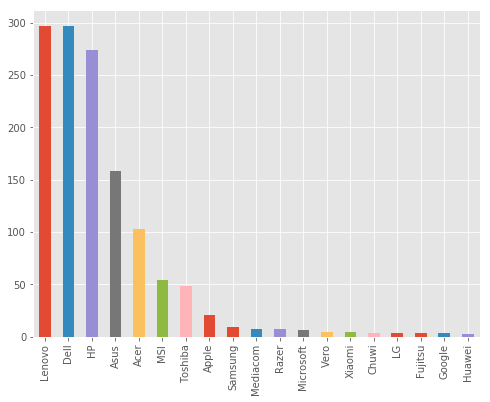

In [79]:
laptops.manufacturer.value_counts().plot.bar()

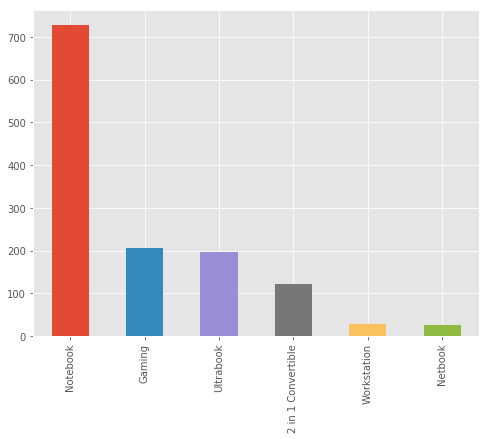

In [80]:
laptops.category.value_counts().plot.bar()

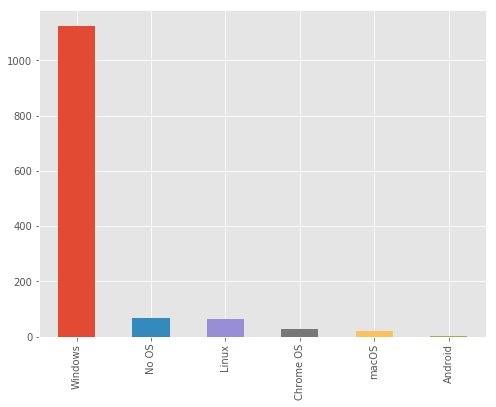

In [81]:
laptops.os_new.value_counts().plot.bar()

### Histograms for Numerical Data

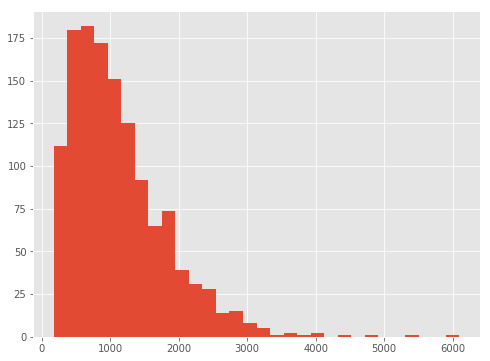

In [82]:
laptops.price_euros_num.hist(bins=30)

In [83]:
laptops[laptops.price_euros_num > 4000]

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros,ram_gb,price_euros_num,weight_kg,cpu_manufacturer,cpu_speed_ghz,os_new
196,Razer,Blade Pro,Gaming,"17.3""",4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows,10,3.49kg,"6099,00",32,6099.0,3.49,Intel,2.9,Windows
610,Lenovo,Thinkpad P51,Notebook,"15.6""",IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32GB,1TB SSD,Nvidia Quadro M2200M,Windows,10,2.5kg,"4899,00",32,4899.0,2.50,Intel,3.1,Windows
749,HP,Zbook 17,Workstation,"17.3""",IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16GB,256GB SSD,Nvidia Quadro M2000M,Windows,7,3kg,"4389,00",16,4389.0,3.00,Intel,2.9,Windows
830,Razer,Blade Pro,Gaming,"17.3""",4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD,Nvidia GeForce GTX 1080,Windows,10,3.49kg,"5499,00",32,5499.0,3.49,Intel,2.9,Windows


### Scatter Plot 

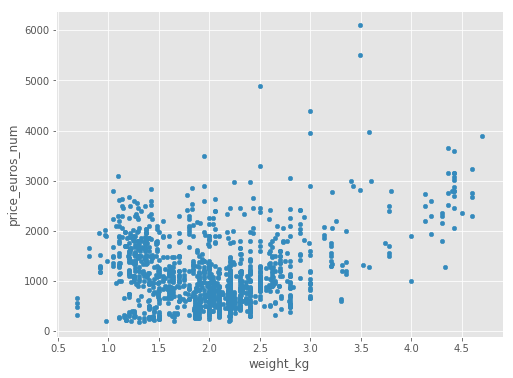

In [84]:
laptops.plot.scatter(x="weight_kg", y="price_euros_num")
plt.show()